# **DATA IMPORT**

sampling strategy diatur 1 dan testing dah bener, DNN 2 layer

In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
df_main = pd.read_csv('creditcard.csv')

In [439]:
df_main.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [440]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [441]:
# Mengambil 1% data untuk masing-masing kategori (fraud = 1, non-fraud = 0)
fraud_data = df_main[df_main['Class'] == 1].sample(frac=0.03, random_state=42)  # Sample 1% dari data fraud
non_fraud_data = df_main[df_main['Class'] == 0].sample(frac=0.03, random_state=42)  # Sample 1% dari data non-fraud

# Menggabungkan kembali data fraud dan non-fraud menjadi satu dataset
df = pd.concat([fraud_data, non_fraud_data])

# Menampilkan informasi tentang sample yang diambil
print(f"Jumlah data fraud yang diambil: {len(fraud_data)}")
print(f"Jumlah data non-fraud yang diambil: {len(non_fraud_data)}")
print(f"Total data yang diambil: {len(df)}")

Jumlah data fraud yang diambil: 15
Jumlah data non-fraud yang diambil: 8529
Total data yang diambil: 8544


In [442]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17407,28692.0,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1
12369,21662.0,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.00,1
143333,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
149357,91075.0,-1.855061,1.554964,-1.405809,0.669327,-0.280230,1.178652,-3.459979,-2.815155,1.242229,...,-0.095308,0.946629,-0.297403,-0.368344,0.198731,-0.078591,0.366709,0.073767,38.76,1
15225,26585.0,-19.856322,12.095893,-22.464083,6.115541,-15.148022,-4.346724,-15.648507,13.276805,-3.974162,...,1.750730,-1.409636,-0.809809,0.121397,1.350300,-0.224292,1.597621,0.476920,99.99,1
74794,55760.0,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,...,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,311.91,1
8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.00,1
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52,1
252124,155662.0,-1.928613,4.601506,-7.124053,5.716088,1.026579,-3.189073,-2.261897,1.185096,-4.441942,...,0.602291,-0.541287,-0.354639,-0.701492,-0.030973,0.034070,0.573393,0.294686,0.77,1
154454,101597.0,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,0.337799,...,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,147.87,1


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

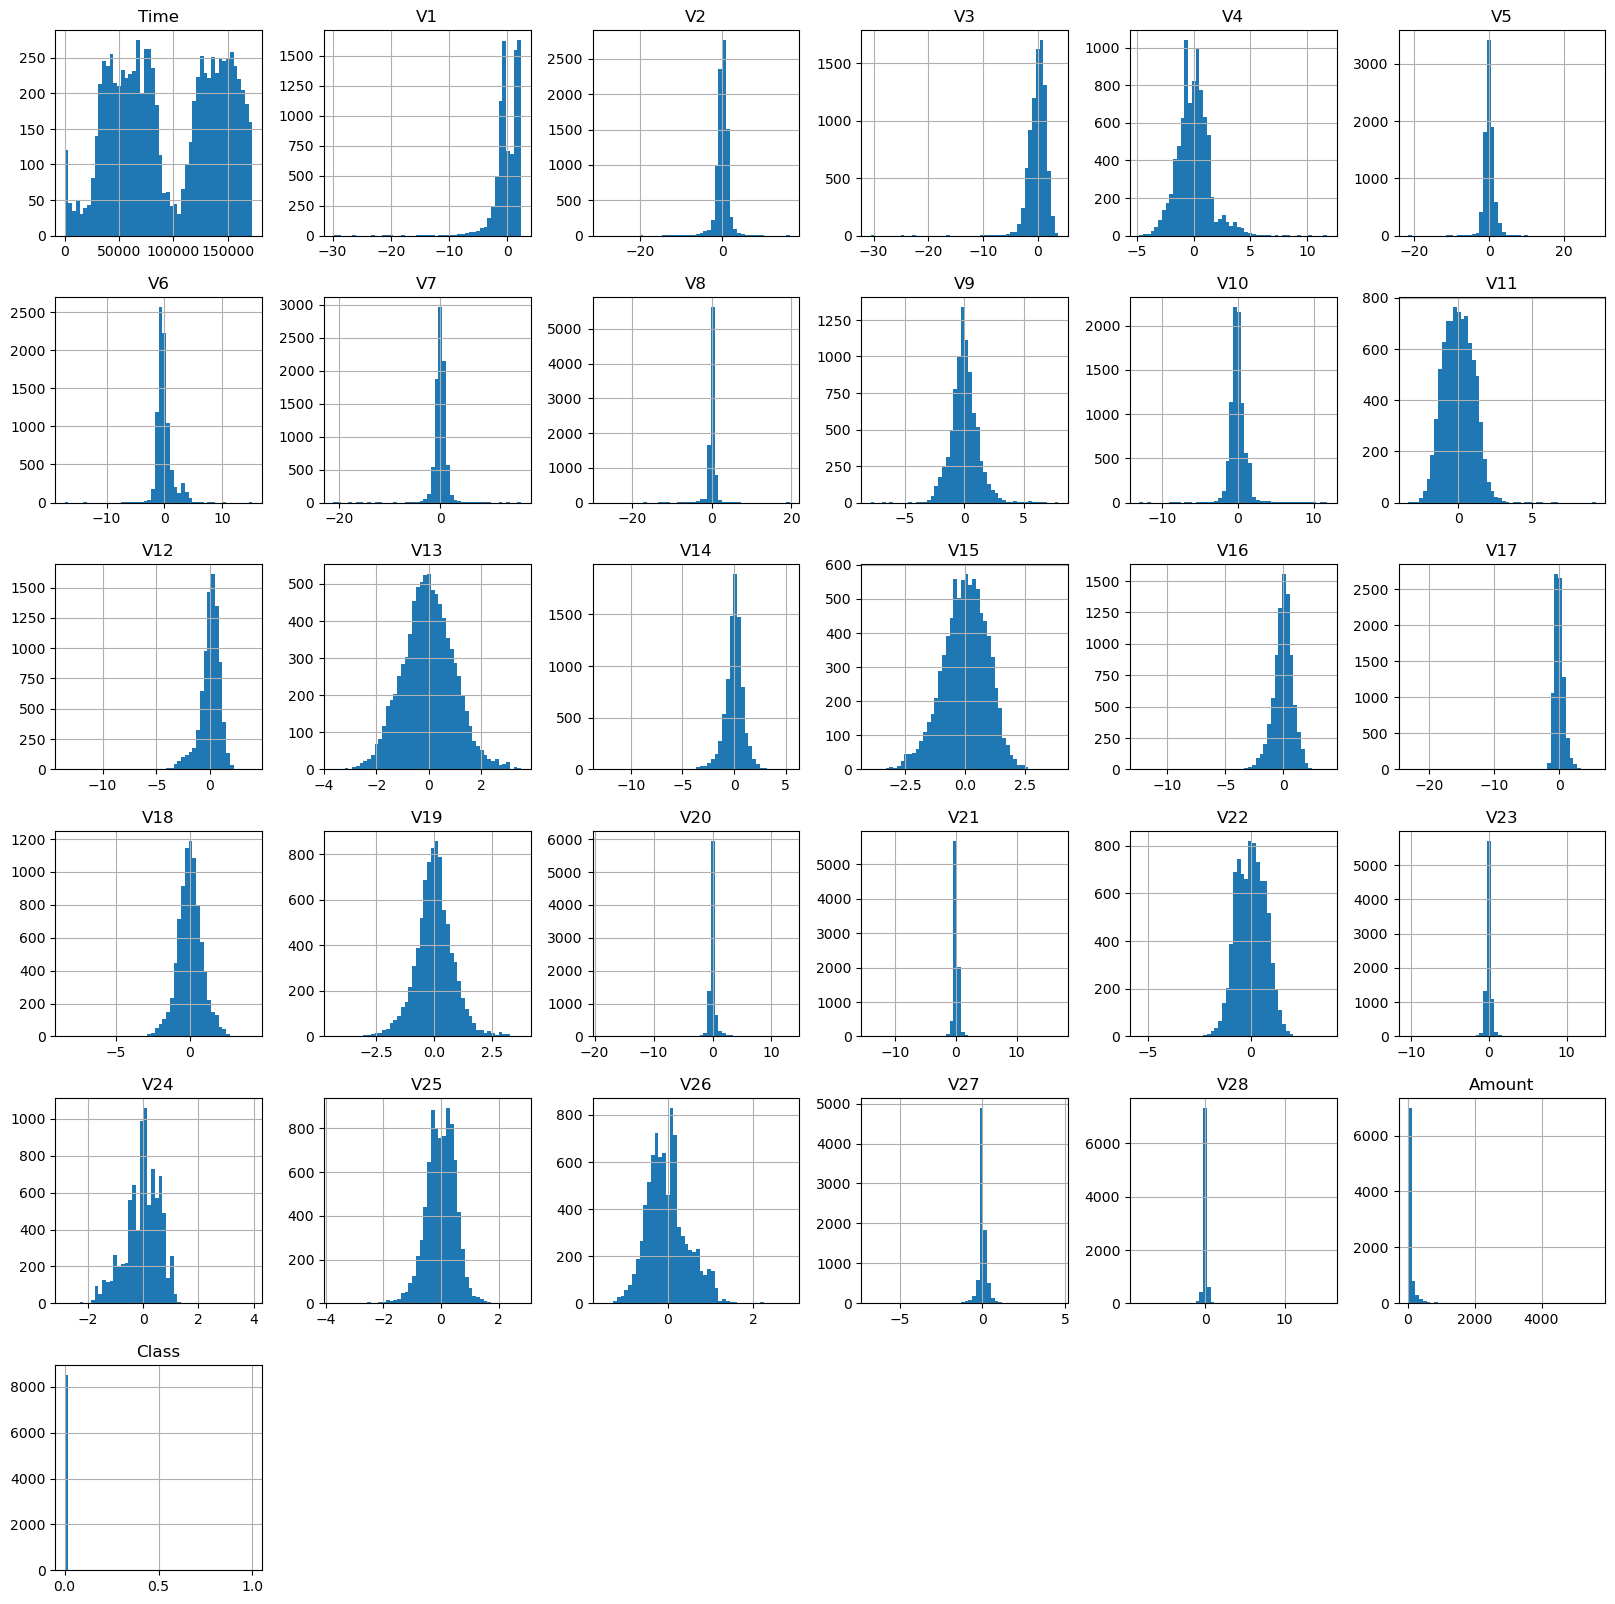

In [443]:
df.hist(figsize=(20,20), bins=50)

C:\Users\hallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time', ylabel='Count'>

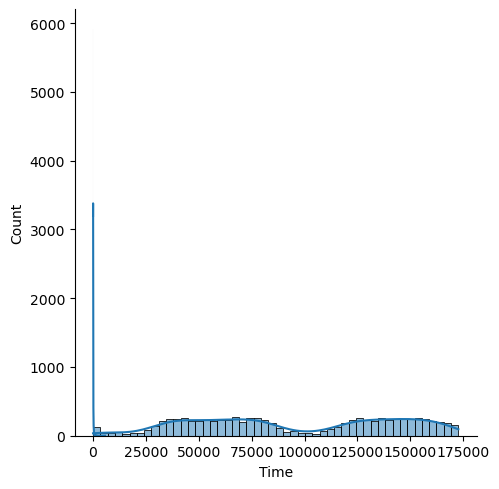

In [444]:
sns.displot(df['Time'], kde=True, bins=50)

sns.histplot(df['Amount'], kde=True, bins=100)

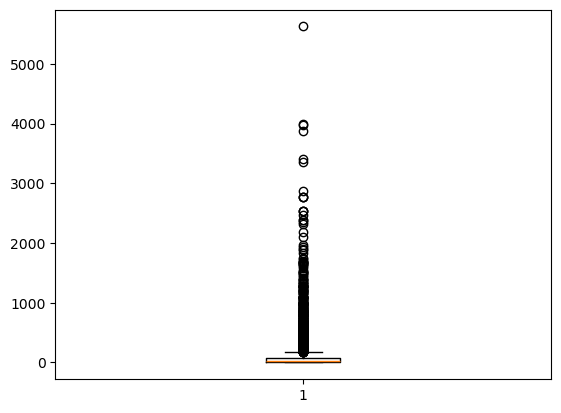

In [445]:
plt.boxplot(df["Amount"])
plt.show()

In [446]:
# separate features and target
y = df["Class"]
x = df.drop("Class", axis=1)

C:\Users\hallo\AppData\Local\Temp\ipykernel_1892\1681451064.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True).sort_index()


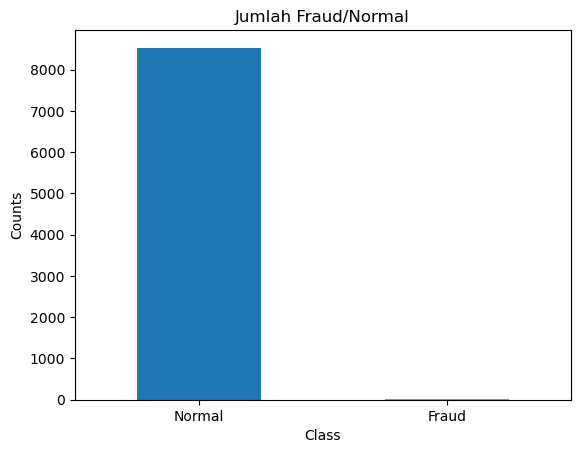

In [447]:
# analysis comparation between fraud and normal data
import matplotlib.pyplot as plt

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar', color=['C0', 'C1'])
plt.title('Jumlah Fraud/Normal')
plt.xticks(range(2), ['Normal', 'Fraud'], rotation = 0)
plt.xlabel("Class")
plt.ylabel("Counts")
plt.show()

# **DATA SPLITING**

In [454]:
# splitting data into training, testing, and validating
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN, SMOTE
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (6835, 30)
Testing set size: (1709, 30)


In [455]:
X_test.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7549,10362.0,0.950605,-0.325516,1.220609,1.639310,-0.929900,0.247928,-0.729555,0.203049,2.255058,...,-0.138214,0.035148,0.267389,-0.105165,-0.001905,0.317100,-0.255386,0.028895,0.038127,96.00
28795,35164.0,-0.805113,0.630042,1.413416,1.161509,-0.344432,-0.253587,0.971969,-0.038379,-0.500456,...,-0.065227,0.161320,0.409858,-0.029029,0.374489,-0.004414,-0.201079,0.028243,0.120024,128.05
40186,40129.0,1.161816,-0.347241,-0.666423,0.448316,1.762486,4.082172,-0.849765,1.027016,0.741867,...,0.013374,-0.148846,-0.307228,-0.161128,1.027731,0.835135,-0.275210,0.053437,0.024200,37.00
41777,40821.0,-0.166822,-3.130054,1.424773,1.715531,-2.717264,1.204849,-0.873729,0.337368,0.780308,...,0.722763,0.169434,-0.003497,-0.588638,0.442808,0.098036,-0.157277,0.037542,0.161469,675.49
111519,72253.0,1.300641,-0.652762,0.275639,-0.741014,-0.977861,-0.531676,-0.542403,-0.048099,-1.022572,...,-0.402447,-0.440555,-0.943961,0.063357,0.013286,0.082561,0.904308,-0.068847,0.003279,44.41
20658,31187.0,1.179761,1.172879,-1.503251,1.686440,0.755649,-1.576853,0.624276,-0.200586,-0.289974,...,-0.155339,-0.174958,-0.429969,-0.124494,0.042224,0.700117,-0.280751,0.048882,0.094352,1.49
212841,139013.0,0.020234,-0.152022,0.336050,-1.720336,1.780968,4.306207,-0.948066,1.302042,0.726771,...,-0.035123,0.285733,0.808773,0.048667,0.744746,-0.781391,0.572199,0.094018,0.054443,14.90
125314,77613.0,-1.253215,1.758471,1.719816,2.708741,-0.056567,1.529020,-0.864988,-3.102803,-0.192266,...,-0.383325,3.056494,-0.422691,0.061007,-0.465925,-0.128512,0.398483,0.462971,-0.000662,21.34
33303,37180.0,1.120121,0.054905,0.034320,1.096545,0.331717,0.660496,0.013339,0.159440,0.034534,...,-0.062610,-0.083342,-0.092416,-0.214343,-0.814781,0.748392,-0.281193,0.031016,0.003497,41.00
91312,63410.0,-2.353454,3.261533,-1.121960,0.403823,-0.352149,-1.333179,0.614923,0.223916,1.067890,...,1.306140,-0.101080,0.451112,0.181432,0.382207,-0.143927,-0.371514,1.365166,0.772435,1.79


In [456]:
from sklearn.preprocessing import QuantileTransformer

#Inisialisasi QuantileTransformer dengan output distribusi normal
quantile_scaler = QuantileTransformer(output_distribution='normal')

#Fit dan transformasi pada data latih
X_train["Time"] = quantile_scaler.fit_transform(X_train["Time"].values.reshape(-1, 1))
X_train["Amount"] = quantile_scaler.fit_transform(X_train["Amount"].values.reshape(-1, 1))

#Transformasi data uji
X_test["Time"] = quantile_scaler.transform(X_test["Time"].values.reshape(-1, 1))
X_test["Amount"] = quantile_scaler.transform(X_test["Amount"].values.reshape(-1, 1))

In [457]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# **IMBALANCED DATA TREATMENT**

In [459]:
# imbalanced data treatment for training
#tanpa penanganan imbalanced
X_train_no_treatment, y_train_no_treatment = X_train, y_train

#dengan penanganan imbalanced data menggunakan ADASYN
adasyn = ADASYN(random_state = 42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

#dengan penanganan imbalanced data mengguanakan SMOTEENN
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [460]:
# Distribusi label setelah ADASYN
print("Distribusi label setelah ADASYN:")
print(pd.Series(y_train_adasyn).value_counts())

# Distribusi label setelah SMOTE
print("\nDistribusi label setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Distribusi label setelah ADASYN:
0    6823
1    6823
Name: count, dtype: int64

Distribusi label setelah SMOTE:
0    6823
1    6823
Name: count, dtype: int64


In [461]:
X_train_adasyn.shape

(13646, 30)

In [462]:
print("Jumlah fitur saat fit:", X_train_smote.shape[1])
print("Jumlah fitur saat transform:", X_test.shape[1])

Jumlah fitur saat fit: 30
Jumlah fitur saat transform: 30


In [463]:
print(type(X_train_no_treatment))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# **FEATURE SELECTION WITH XGBOOST**

In [465]:
scale_pos_weight = len(y_train_no_treatment[y_train_no_treatment == 0]) / len(y_train_no_treatment[y_train_no_treatment == 1])
scale_pos_weight_adasyn = len(y_train_adasyn[y_train_adasyn == 0]) / len(y_train_adasyn[y_train_adasyn == 1])
scale_pos_weight_smote = len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1])

In [466]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectFromModel

# Initialize models
xgb_model_no_treatment = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss')
xgb_model_adasyn = XGBClassifier(scale_pos_weight=scale_pos_weight_adasyn, eval_metric='logloss')
xgb_model_smote = XGBClassifier(scale_pos_weight=scale_pos_weight_smote, eval_metric='logloss')

# Train the models
xgb_model_no_treatment.fit(X_train_no_treatment, y_train_no_treatment)
xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = xgb_model_no_treatment.feature_importances_
importances_adasyn = xgb_model_adasyn.feature_importances_
importances_smote = xgb_model_smote.feature_importances_

# Set up different thresholds for feature selection
thresholds = np.sort(importances)[::-1]  # Sort in descending order
thresholds_adasyn = np.sort(importances_adasyn)[::-1]  # Sort in descending order
thresholds_smote = np.sort(importances_smote)[::-1]  # Sort in descending order

# Store the results for different thresholds
results_no_treatment = []
results_adasyn = []
results_smote = []

for threshold, t_adasyn, t_smote in zip(thresholds, thresholds_adasyn, thresholds_smote):
    # Select features using the corresponding threshold for each model separately
    selection_no_treatment = SelectFromModel(xgb_model_no_treatment, threshold=threshold, prefit=True)
    selection_adasyn = SelectFromModel(xgb_model_adasyn, threshold=t_adasyn, prefit=True)
    selection_smote = SelectFromModel(xgb_model_smote, threshold=t_smote, prefit=True)

    # Transform the datasets for each model separately
    select_X_train_no_treatment = selection_no_treatment.transform(X_train_no_treatment)
    select_X_train_adasyn = selection_adasyn.transform(X_train_adasyn)
    select_X_train_smote = selection_smote.transform(X_train_smote)

    select_X_test_no_treatment = selection_no_treatment.transform(X_test)
    select_X_test_adasyn = selection_adasyn.transform(X_test)
    select_X_test_smote = selection_smote.transform(X_test)

    # Train models with selected features
    selection_model_no_treatment = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss')
    selection_model_no_treatment.fit(select_X_train_no_treatment, y_train_no_treatment)

    selection_model_adasyn = XGBClassifier(scale_pos_weight=scale_pos_weight_adasyn, eval_metric='logloss')
    selection_model_adasyn.fit(select_X_train_adasyn, y_train_adasyn)

    selection_model_smote = XGBClassifier(scale_pos_weight=scale_pos_weight_smote, eval_metric='logloss')
    selection_model_smote.fit(select_X_train_smote, y_train_smote)

    # Evaluate the models on the test set
    y_pred_no_treatment = selection_model_no_treatment.predict(select_X_test_no_treatment)
    accuracy1 = accuracy_score(y_test, y_pred_no_treatment)
    precision1 = precision_score(y_test, y_pred_no_treatment)
    recall1 = recall_score(y_test, y_pred_no_treatment)
    f1_score1 = f1_score(y_test, y_pred_no_treatment)

    y_pred_adasyn = selection_model_adasyn.predict(select_X_test_adasyn)
    accuracy2 = accuracy_score(y_test, y_pred_adasyn)
    precision2 = precision_score(y_test, y_pred_adasyn)
    recall2 = recall_score(y_test, y_pred_adasyn)
    f1_score2 = f1_score(y_test, y_pred_adasyn)

    y_pred_smote = selection_model_smote.predict(select_X_test_smote)
    accuracy3 = accuracy_score(y_test, y_pred_smote)
    precision3 = precision_score(y_test, y_pred_smote)
    recall3 = recall_score(y_test, y_pred_smote)
    f1_score3 = f1_score(y_test, y_pred_smote)

    # Store results for each threshold
    results_no_treatment.append({
        'Threshold': threshold,
        'Number of Features': select_X_train_no_treatment.shape[1],
        'Accuracy': accuracy1,
        'Precision': precision1,
        'Recall': recall1,
        'F1-Score': f1_score1
    })

    results_adasyn.append({
        'Threshold': t_adasyn,
        'Number of Features': select_X_train_adasyn.shape[1],
        'Accuracy': accuracy2,
        'Precision': precision2,
        'Recall': recall2,
        'F1-Score': f1_score2
    })

    results_smote.append({
        'Threshold': t_smote,
        'Number of Features': select_X_train_smote.shape[1],
        'Accuracy': accuracy3,
        'Precision': precision3,
        'Recall': recall3,
        'F1-Score': f1_score3
    })

# Convert results to dataframes for easy viewing
results_no_treatment_df = pd.DataFrame(results_no_treatment)
results_adasyn_df = pd.DataFrame(results_adasyn)
results_smote_df = pd.DataFrame(results_smote)

In [467]:
# Display the results for each condition
print("Results for No Handling of Imbalance:")
print(results_no_treatment_df)

print("\nResults for ADASYN Handling:")
print(results_adasyn_df)

print("\nResults for SMOTE Handling:")
print(results_smote_df)

Results for No Handling of Imbalance:
    Threshold  Number of Features  Accuracy  Precision    Recall  F1-Score
0    0.740600                   1  0.992393   0.187500  1.000000  0.315789
1    0.188950                   2  0.998830   0.666667  0.666667  0.666667
2    0.020529                   3  0.999415   0.750000  1.000000  0.857143
3    0.015584                   4  0.998245   0.500000  1.000000  0.666667
4    0.007575                   5  0.998245   0.500000  1.000000  0.666667
5    0.007517                   6  0.998245   0.500000  1.000000  0.666667
6    0.005510                   7  0.997659   0.428571  1.000000  0.600000
7    0.003803                   8  0.997659   0.428571  1.000000  0.600000
8    0.003560                   9  0.998245   0.500000  1.000000  0.666667
9    0.003290                  10  0.998245   0.500000  1.000000  0.666667
10   0.000736                  11  0.998245   0.500000  1.000000  0.666667
11   0.000655                  12  0.998245   0.500000  1.0000

ga tau nih, kita pilih berdasarkan akurasi tertinggi atau ga. Saat ini pilih berdasarkan F1 ajalah, karena di kasus ini precision dan recall penting banget (gak bisa diprioritasin salah satu)

In [469]:
# Find the row with the maximum accuracy for each method
best_no_treatment_acc = results_no_treatment_df.loc[results_no_treatment_df['Accuracy'].idxmax()]
best_adasyn_acc = results_adasyn_df.loc[results_adasyn_df['Accuracy'].idxmax()]
best_smote_acc = results_smote_df.loc[results_smote_df['Accuracy'].idxmax()]

# Find the row with the maximum precision for each method
best_no_treatment_pre = results_no_treatment_df.loc[results_no_treatment_df['Precision'].idxmax()]
best_adasyn_pre = results_adasyn_df.loc[results_adasyn_df['Precision'].idxmax()]
best_smote_pre = results_smote_df.loc[results_smote_df['Precision'].idxmax()]

# Find the row with the maximum recall for each method
best_no_treatment_rec = results_no_treatment_df.loc[results_no_treatment_df['Recall'].idxmax()]
best_adasyn_rec = results_adasyn_df.loc[results_adasyn_df['Recall'].idxmax()]
best_smote_rec = results_smote_df.loc[results_smote_df['Recall'].idxmax()]

# Find the row with the maximum f1-score for each method
best_no_treatment_f1 = results_no_treatment_df.loc[results_no_treatment_df['F1-Score'].idxmax()]
best_adasyn_f1 = results_adasyn_df.loc[results_adasyn_df['F1-Score'].idxmax()]
best_smote_f1 = results_smote_df.loc[results_smote_df['F1-Score'].idxmax()]

# Display the best threshold, number of features, and accuracy for each method
print("Best Threshold for No Handling of Imbalance:")
print(best_no_treatment_acc, "\n")
print(best_no_treatment_pre, "\n")
print(best_no_treatment_rec, "\n")
print(best_no_treatment_f1, "\n")

print("\nBest Threshold for ADASYN:")
print(best_adasyn_acc, "\n")
print(best_adasyn_pre, "\n")
print(best_adasyn_rec, "\n")
print(best_adasyn_f1, "\n")

print("\nBest Threshold for SMOTE:")
print(best_smote_acc, "\n")
print(best_smote_pre, "\n")
print(best_smote_rec, "\n")
print(best_smote_f1, "\n")

Best Threshold for No Handling of Imbalance:
Threshold             0.020529
Number of Features    3.000000
Accuracy              0.999415
Precision             0.750000
Recall                1.000000
F1-Score              0.857143
Name: 2, dtype: float64 

Threshold             0.020529
Number of Features    3.000000
Accuracy              0.999415
Precision             0.750000
Recall                1.000000
F1-Score              0.857143
Name: 2, dtype: float64 

Threshold             0.740600
Number of Features    1.000000
Accuracy              0.992393
Precision             0.187500
Recall                1.000000
F1-Score              0.315789
Name: 0, dtype: float64 

Threshold             0.020529
Number of Features    3.000000
Accuracy              0.999415
Precision             0.750000
Recall                1.000000
F1-Score              0.857143
Name: 2, dtype: float64 


Best Threshold for ADASYN:
Threshold             0.002897
Number of Features    8.000000
Accuracy         

In [470]:
# simpen tiap selected feature terbaik di masing2 metode ke dataset baru (buat baru)
# save every best threshold based on the highest F1 Score from each method
best_threshold_no_treatment = best_no_treatment_f1['Threshold'] #single humber or nilai thresholdnya
best_threshold_adasyn = best_adasyn_f1['Threshold']
best_threshold_smote = best_smote_f1['Threshold']

# set up feature selectors with the best F1 Thresholds
selection_no_treatment = SelectFromModel(xgb_model_no_treatment, threshold=best_threshold_no_treatment, prefit=True)
selection_adasyn = SelectFromModel(xgb_model_adasyn, threshold=best_threshold_adasyn, prefit=True)
selection_smote = SelectFromModel(xgb_model_smote, threshold=best_threshold_smote, prefit=True)

# Transform the datasets with the best thresholds to get selected features
  # No treatment
X_train_no_treatment_selected = selection_no_treatment.transform(X_train_no_treatment)
X_test_no_treatment_selected = selection_no_treatment.transform(X_test) # ini dataset test harus disamain dlu fiturnya sama yang training biar gak error

  # ADASYN
X_train_adasyn_selected = selection_adasyn.transform(X_train_adasyn)
X_test_adasyn_selected = selection_adasyn.transform(X_test)

  # SMOTE
X_train_smote_selected = selection_smote.transform(X_train_smote)
X_test_smote_selected = selection_smote.transform(X_test)

# Convert selected features to DataFrames
  # No treatment
df_X_train_no_treatment_selected = pd.DataFrame(X_train_no_treatment_selected)
df_X_test_no_treatment_selected = pd.DataFrame(X_test_no_treatment_selected)

  # ADASYN
df_X_train_adasyn_selected = pd.DataFrame(X_train_adasyn_selected)
df_X_test_adasyn_selected = pd.DataFrame(X_test_adasyn_selected)

  # SMOTE
df_X_train_smote_selected = pd.DataFrame(X_train_smote_selected)
df_X_test_smote_selected = pd.DataFrame(X_test_smote_selected)

df_X_train_no_treatment_selected = df_X_train_no_treatment_selected.to_numpy()
df_X_train_adasyn_selected = df_X_train_adasyn_selected.to_numpy()
df_X_train_smote_selected = df_X_train_smote_selected.to_numpy()

y_train_no_treatment = y_train_no_treatment.values if isinstance(y_train_no_treatment, pd.Series) else y_train_no_treatment
y_train_adasyn = y_train_adasyn.values if isinstance(y_train_adasyn, pd.Series) else y_train_adasyn
y_train_smote = y_train_smote.values if isinstance(y_train_smote, pd.Series) else y_train_smote

# # Optionally, save these DataFrames to CSV files for later use in the DNN
# df_X_train_no_resample_selected.to_csv("X_train_no_resample_selected.csv", index=False)
# df_X_test_no_resample_selected.to_csv("X_test_no_resample_selected.csv", index=False)

# df_X_train_adasyn_selected.to_csv("X_train_adasyn_selected.csv", index=False)
# df_X_test_adasyn_selected.to_csv("X_test_adasyn_selected.csv", index=False)

# df_X_train_smote_selected.to_csv("X_train_smote_selected.csv", index=False)
# df_X_test_smote_selected.to_csv("X_test_smote_selected.csv", index=False)

In [471]:
print(np.bincount(y_train_no_treatment))

[6823   12]


# **DNN MODELING**

In [473]:
!pip install tensorflow

In [474]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def build_ann_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')  # Output layer
    ])

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# **TRAINING**

In [477]:
# No treatment
input_shape = df_X_train_no_treatment_selected.shape[1]
model_no_treatment = build_ann_model(input_shape)
# train the model
model_no_treatment.fit(df_X_train_no_treatment_selected, y_train_no_treatment, epochs=10, batch_size=32, verbose=1)

# adasyn
input_shape_adasyn = df_X_train_adasyn_selected.shape[1]
model_adasyn = build_ann_model(input_shape_adasyn)
# train the model
model_adasyn.fit(df_X_train_adasyn_selected, y_train_adasyn, epochs=10, batch_size=32, verbose=1)

# smote
input_shape_smote = df_X_train_smote_selected.shape[1]
model_smote = build_ann_model(input_shape_smote)
# train the model
model_smote.fit(df_X_train_smote_selected, y_train_smote, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.9677 - loss: 0.1309
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.9990 - loss: 0.0024
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.9999 - loss: 6.8583e-04
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.9992 - loss: 0.0022
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.9994 - loss: 0.0025
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.9994 - loss: 0.0022
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9987 - loss: 0.0038
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9996 - loss: 0.0013
Epoch 9/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.9996 - loss: 0.0033
Epoch 10/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9997 - loss: 0.0013
Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.9759 - loss: 0.0580
Epoch 2/10
427/427 ━━━━━━━━

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ADASYN - Test Metrics:
Loss: 0.03306051343679428
Accuracy: 0.99941486120224
Precision: 0.75
Recall: 1.0
F1 Score: 0.8571428571428571


Confusion Matrix:
[[1705    1]
 [   0    3]]


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
SMOTE - Test Metrics:
Loss: 0.012771574780344963
Accuracy: 0.99941486120224
Precision: 0.75
Recall: 1.0
F1 Score: 0.8571428571428571


Confusion Matrix:
[[1705    1]
 [   0    3]]




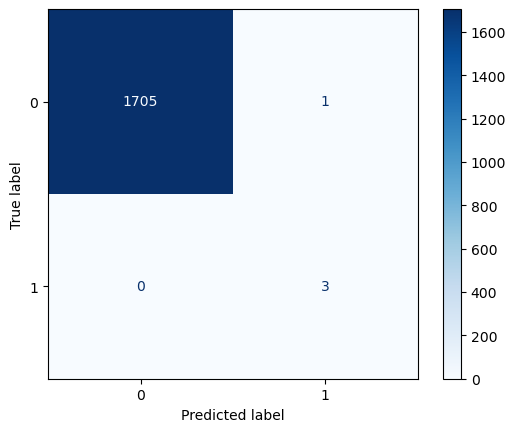

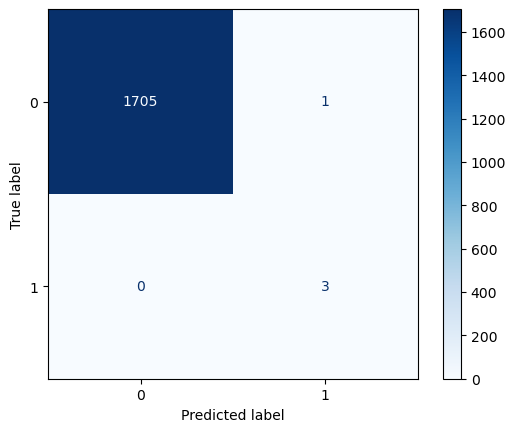

In [479]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, method_name):
  # evaluate loss and accuracy
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

  # get predictions and convert probabilities to class labels
  y_pred_probs = model.predict(X_test)
  y_pred = np.argmax(y_pred_probs, axis=1)

  # calculate precision, recall, and f1 score
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Print all metrics
  print(f"{method_name} - Test Metrics:")
  print("Loss:", loss)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
  print("\n")

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(cm)

  # Optional: Display Confusion Matrix as a plot
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
  disp.plot(cmap="Blues")
  print("\n")

# For ADASYN Method
evaluate_model(model_adasyn, df_X_test_adasyn_selected, y_test, "ADASYN")

# For SMOTE Method
evaluate_model(model_smote, df_X_test_smote_selected, y_test, "SMOTE")

# **HYPERPARAMETER TUNING**

In [484]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [489]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.losses import SparseCategoricalCrossentropy

def build_ann_model(hp, input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))

    # Hyperparameter tuning untuk jumlah neuron di hidden layer pertama
    model.add(Dense(units=hp.Int('units_layer1', min_value=32, max_value=128, step=32), activation='relu'))
    
    # Hyperparameter tuning untuk jumlah hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_layer{i+2}', min_value=16, max_value=64, step=16), activation='relu'))

    # Layer output
    model.add(Dense(2, activation='softmax'))

    # Hyperparameter tuning untuk learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    return model

# Inisialisasi tuner dengan RandomSearch
tuner = RandomSearch(
    lambda hp: build_ann_model(hp, input_shape),
    objective='accuracy',
    max_trials=5,  # Jumlah percobaan kombinasi hyperparameter
    executions_per_trial=3,  # Mengeksekusi ulang setiap percobaan 3 kali untuk stabilitas
    directory='my_dir_vers3.4',  # Folder penyimpanan hasil
    project_name='dnn_hyperparameter_tuning'
)

# Inisialisasi tuner dengan RandomSearch
tuner_adasyn = RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_adasyn),
    objective='accuracy',
    max_trials=5,  # Jumlah percobaan kombinasi hyperparameter
    executions_per_trial=3,  # Mengeksekusi ulang setiap percobaan 3 kali untuk stabilitas
    directory='my_dir_adasyn_vers3.4',  # Folder penyimpanan hasil
    project_name='dnn_hyperparameter_tuning'
)

tuner_smote = RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_smote),
    objective='accuracy',
    max_trials=5,  # Jumlah percobaan kombinasi hyperparameter
    executions_per_trial=3,  # Mengeksekusi ulang setiap percobaan 3 kali untuk stabilitas
    directory='my_dir_smote_vers3.4',  # Folder penyimpanan hasil
    project_name='dnn_hyperparameter_tuning'
)

In [490]:
# Tentukan input_shape berdasarkan data pelatihan
input_shape = df_X_train_no_treatment_selected.shape[1]

# Memulai pencarian hyperparameter
tuner.search(df_X_train_no_treatment_selected, y_train_no_treatment, epochs=10, batch_size=32)

# Mendapatkan hasil hyperparameter terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of units in the first dense layer: {best_hps.get('units_layer1')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# Membangun model terbaik dengan hyperparameter yang ditemukan
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(df_X_train_no_treatment_selected, y_train_no_treatment, epochs=10, verbose=1)

Trial 5 Complete [00h 00m 16s]
accuracy: 0.9997561573982239

Best accuracy So Far: 0.9998536705970764
Total elapsed time: 00h 01m 24s
Best number of units in the first dense layer: 64
Best learning rate: 0.001
Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8817 - loss: 0.4244  
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.9987 - loss: 0.0211
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.9987 - loss: 0.0072
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.9992 - loss: 0.0017
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.9998 - loss: 8.4629e-04
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9999 - loss: 0.0013
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.9996 - loss: 0.0015
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 1.0000 - loss: 4.3042e-04
Epoch 9/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.9998 - los

In [497]:
# Tentukan input_shape berdasarkan data pelatihan
input_shape_adasyn = df_X_train_adasyn_selected.shape[1]

# Memulai pencarian hyperparameter
tuner_adasyn.search(df_X_train_adasyn_selected, y_train_adasyn, epochs=10, batch_size=32)

# Mendapatkan hasil hyperparameter terbaik
best_hps_adasyn = tuner_adasyn.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of units in the first dense layer: {best_hps_adasyn.get('units_layer1')}")
print(f"Best learning rate: {best_hps_adasyn.get('learning_rate')}")

# Membangun model terbaik dengan hyperparameter yang ditemukan
best_model_adasyn = tuner_adasyn.hypermodel.build(best_hps_adasyn)
best_model_adasyn.fit(df_X_train_adasyn_selected, y_train_adasyn, epochs=10, verbose=1)

Trial 5 Complete [00h 00m 23s]
accuracy: 1.0

Best accuracy So Far: 1.0
Total elapsed time: 00h 01m 51s
Best number of units in the first dense layer: 32
Best learning rate: 0.01
Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.9868 - loss: 0.0308
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 1.0000 - loss: 6.6629e-05
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 1.0000 - loss: 2.6896e-06
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 1.0000 - loss: 2.0237e-06
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 1.0000 - loss: 1.0311e-06
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 1.0000 - loss: 1.2631e-06
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 1.0000 - loss: 9.0967e-07
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 1.0000 - loss: 3.9077e-07
Epoch 9/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 1.0000 - loss: 4.7600e-

In [498]:
# Tentukan input_shape berdasarkan data pelatihan
input_shape_smote = df_X_train_smote_selected.shape[1]

# Memulai pencarian hyperparameter
tuner_smote.search(df_X_train_smote_selected, y_train_smote, epochs=10, batch_size=32)

# Mendapatkan hasil hyperparameter terbaik
best_hps_smote = tuner_smote.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of units in the first dense layer: {best_hps_smote.get('units_layer1')}")
print(f"Best learning rate: {best_hps_smote.get('learning_rate')}")

# Membangun model terbaik dengan hyperparameter yang ditemukan
best_model_smote = tuner_smote.hypermodel.build(best_hps_smote)
best_model_smote.fit(df_X_train_smote_selected, y_train_smote, epochs=10, verbose=1)

Trial 5 Complete [00h 00m 23s]
accuracy: 0.9998534520467123

Best accuracy So Far: 0.9998534520467123
Total elapsed time: 00h 01m 53s
Best number of units in the first dense layer: 128
Best learning rate: 0.01
Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.9808 - loss: 0.0461
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9991 - loss: 0.0072
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.9989 - loss: 0.0054
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9997 - loss: 0.0015
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.9995 - loss: 0.0034
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.9992 - loss: 0.0071
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9996 - loss: 0.0017
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.9994 - loss: 0.0036
Epoch 9/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.9997 - loss: 0.002

# **K-FOLD CROSS VALIDATION**

In [500]:
from sklearn.model_selection import StratifiedKFold

# Variasi nilai fold
fold_values = [5, 10]

def kfold_cross_validation(X, y, method_name, fold_values, tuner, best_hps):
    for k in fold_values:
        print(f"\nPerforming {k}-Fold Cross-Validation for {method_name}")

        # Inisialisasi K-Fold cross-validator dengan k folds
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        # List untuk menyimpan hasil metrik dari setiap fold
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        for train_index, val_index in skf.split(X, y):
            # Pisahkan data menjadi set pelatihan dan validasi untuk fold ini
            X_train_fold, X_val_fold = X[train_index], X[val_index]
            y_train_fold, y_val_fold = y[train_index], y[val_index]

            # Bangun dan latih model DNN dengan best hyperparameters
            global model
            model = tuner.hypermodel.build(best_hps)
            model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

            # Dapatkan prediksi pada set validasi
            y_pred_probs = model.predict(X_val_fold)
            y_pred = np.argmax(y_pred_probs, axis=1)

            # Hitung metrik untuk fold ini
            accuracy = accuracy_score(y_val_fold, y_pred)
            precision = precision_score(y_val_fold, y_pred)
            recall = recall_score(y_val_fold, y_pred)
            f1 = f1_score(y_val_fold, y_pred)

            # Tambahkan metrik ke list
            accuracy_scores.append(accuracy)
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

        # Hitung dan tampilkan metrik rata-rata untuk setiap jumlah fold
        print(f"{k}-Fold Results for {method_name}:")
        print("Average Accuracy:", np.mean(accuracy_scores))
        print("Average Precision:", np.mean(precision_scores))
        print("Average Recall:", np.mean(recall_scores))
        print("Average F1 Score:", np.mean(f1_scores))
        print("\n")

# Menjalankan K-Fold cross-validation pada setiap metode menggunakan best hyperparameters
# Untuk metode No Treatment
kfold_cross_validation(df_X_train_no_treatment_selected, y_train_no_treatment, "No Treatment", fold_values, tuner, best_hps)

# Untuk metode ADASYN
kfold_cross_validation(df_X_train_adasyn_selected, y_train_adasyn, "ADASYN", fold_values, tuner_adasyn, best_hps_adasyn)

# Untuk metode SMOTE
kfold_cross_validation(df_X_train_smote_selected, y_train_smote, "SMOTE", fold_values, tuner_smote, best_hps_smote)


Performing 5-Fold Cross-Validation for No Treatment
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
5-Fold Results for No Treatment:
Average Accuracy: 0.9994147768836867
Average Precision: 0.9
Average Recall: 0.7666666666666667
Average F1 Score: 0.8133333333333332



Performing 10-Fold Cross-Validation for No Treatment
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\hallo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10-Fold Results for No Treatment:
Average Accuracy: 0.9997073882852568
Average Precision: 0.8666666666666666
Average Recall: 0.9
Average F1 Score: 0.8800000000000001



Performing 5-Fold Cross-Validation for ADASYN
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
5-Fold Results for ADASYN:
Average Accuracy: 0.9998534261634298
Average Precision: 0.9998535871156662
Average Recall: 0.9998533724340175
Average F1 Score: 0.9998534260847054



Performing 10-Fold Cross-Validation for ADASYN
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 

# **TESTING**

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Results for No Treatment:
Average Accuracy: 0.9994148624926857
Average Precision: 0.9995611468695144
Average Recall: 0.9994148624926857
Average F1 Score: 0.9994565722567872


Confusion Matrix:
[[1705    1]
 [   0    3]]


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Results for ADASYN:
Average Accuracy: 0.9994148624926857
Average Precision: 0.9995611468695144
Average Recall: 0.9994148624926857
Average F1 Score: 0.9994565722567872


Confusion Matrix:
[[1705    1]
 [   0    3]]


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Results for SMOTE:
Average Accuracy: 0.9994148624926857
Average Precision: 0.9995611468695144
Average Recall: 0.9994148624926857
Average F1 Score: 0.9994565722567872


Confusion Matrix:
[[1705    1]
 [   0    3]]




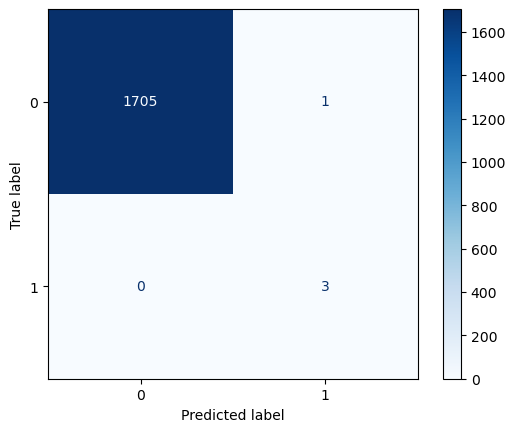

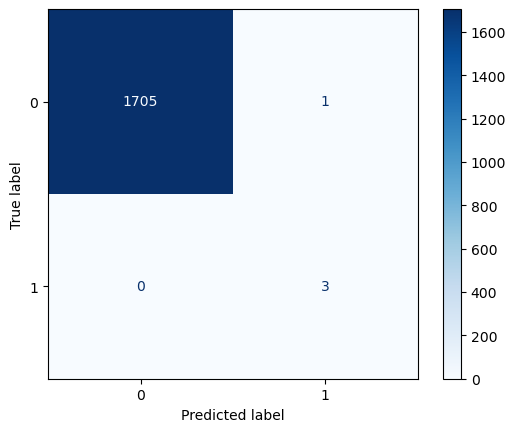

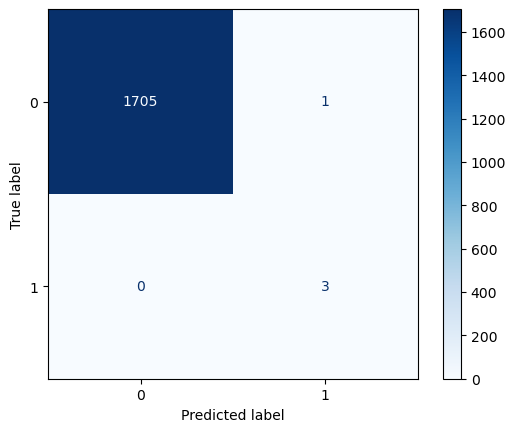

In [502]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def final_training_testing(X_train, y_train, X_test, method_name, tuner, model, best_hps):
    # List untuk menyimpan hasil metrik dari setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Bangun dan latih model DNN dengan best hyperparameters
    global model
    model = tuner.hypermodel.build(best_hps)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Dapatkan prediksi pada set validasi
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Hitung metrik untuk fold ini
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Tambahkan metrik ke list
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Hitung dan tampilkan metrik rata-rata untuk setiap jumlah fold
    print(f"Results for {method_name}:")
    print("Average Accuracy:", np.mean(accuracy_scores))
    print("Average Precision:", np.mean(precision_scores))
    print("Average Recall:", np.mean(recall_scores))
    print("Average F1 Score:", np.mean(f1_scores))
    print("\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Optional: Display Confusion Matrix as a plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    print("\n")

# Menjalankan K-Fold cross-validation pada setiap metode menggunakan best hyperparameters
# Untuk metode No Treatment
final_training_testing(df_X_train_no_treatment_selected, y_train_no_treatment, df_X_test_no_treatment_selected, "No Treatment", tuner, best_model, best_hps)

# Untuk metode ADASYN
final_training_testing(df_X_train_adasyn_selected, y_train_adasyn, df_X_test_adasyn_selected, "ADASYN", tuner_adasyn, best_model_adasyn, best_hps_adasyn)

# Untuk metode SMOTE
final_training_testing(df_X_train_smote_selected, y_train_smote, df_X_test_smote_selected, "SMOTE", tuner_smote, best_model_smote, best_hps_smote)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Results for No Treatment:
Average Accuracy: 0.9994148624926857
Average Precision: 0.75
Average Recall: 1.0
Average F1 Score: 0.8571428571428571


Confusion Matrix:
[[1705    1]
 [   0    3]]


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Results for ADASYN:
Average Accuracy: 0.9988297249853716
Average Precision: 0.6
Average Recall: 1.0
Average F1 Score: 0.7499999999999999


Confusion Matrix:
[[1704    2]
 [   0    3]]


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Results for SMOTE:
Average Accuracy: 0.9994148624926857
Average Precision: 0.75
Average Recall: 1.0
Average F1 Score: 0.8571428571428571


Confusion Matrix:
[[1705    1]
 [   0    3]]




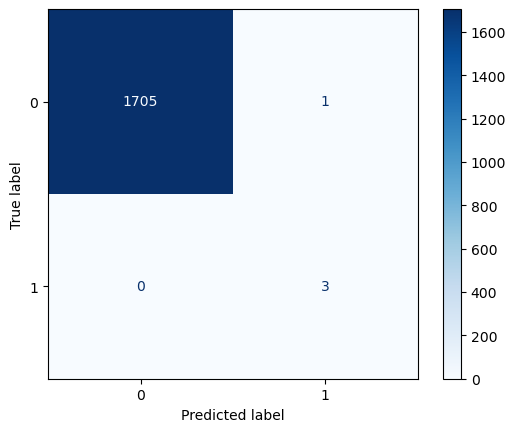

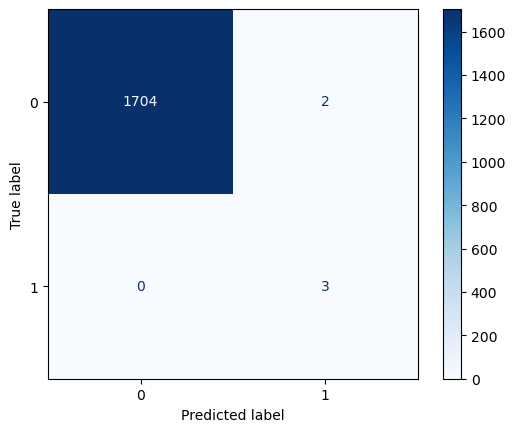

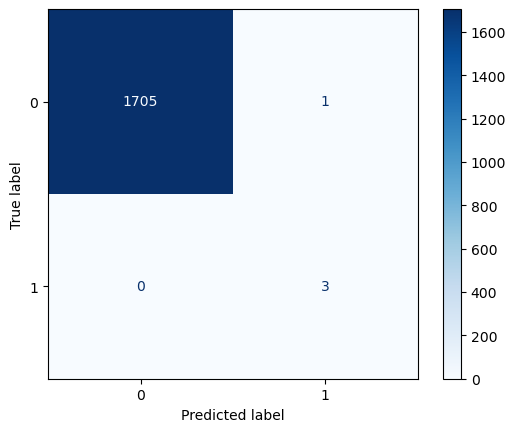

In [504]:
def final_training_testing_not_weighten(X_train, y_train, X_test, method_name, tuner, model, best_hps):
    # List untuk menyimpan hasil metrik dari setiap fold
    accuracy_score2 = []
    precision_score2 = []
    recall_score2 = []
    f1_score2 = []

    # Bangun dan latih model DNN dengan best hyperparameters
    model = tuner.hypermodel.build(best_hps)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Dapatkan prediksi pada set validasi
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Hitung metrik untuk fold ini
    accuracy2 = accuracy_score(y_test, y_pred)
    precision2 = precision_score(y_test, y_pred)
    recall2 = recall_score(y_test, y_pred)
    f12 = f1_score(y_test, y_pred)

    # Tambahkan metrik ke list
    accuracy_score2.append(accuracy2)
    precision_score2.append(precision2)
    recall_score2.append(recall2)
    f1_score2.append(f12)

    # Hitung dan tampilkan metrik rata-rata untuk setiap jumlah fold
    print(f"Results for {method_name}:")
    print("Average Accuracy:", np.mean(accuracy_score2))
    print("Average Precision:", np.mean(precision_score2))
    print("Average Recall:", np.mean(recall_score2))
    print("Average F1 Score:", np.mean(f1_score2))
    print("\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Optional: Display Confusion Matrix as a plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    print("\n")

# Menjalankan K-Fold cross-validation pada setiap metode menggunakan best hyperparameters
# Untuk metode No Treatment
final_training_testing_not_weighten(df_X_train_no_treatment_selected, y_train_no_treatment, df_X_test_no_treatment_selected, "No Treatment", tuner, best_model, best_hps)

# Untuk metode ADASYN
final_training_testing_not_weighten(df_X_train_adasyn_selected, y_train_adasyn, df_X_test_adasyn_selected, "ADASYN", tuner_adasyn, best_model_adasyn, best_hps_adasyn)

# Untuk metode SMOTE
final_training_testing_not_weighten(df_X_train_smote_selected, y_train_smote, df_X_test_smote_selected, "SMOTE", tuner_smote, best_model_smote, best_hps_smote)

In [ ]:
import joblib

# Fungsi untuk memuat model dan melakukan prediksi
def load_and_predict(model, X_data):
    """
    Fungsi untuk memuat model yang telah dilatih dan melakukan prediksi.
    :param model: Model yang sudah dilatih
    :param X_data: Data input untuk prediksi
    :return: Prediksi dari model
    """
    return model.predict(X_data)

# Fungsi untuk memilih fitur dan melakukan prediksi menggunakan model terlatih
def process_and_predict(model, model_type, X_train, y_train, X_test, threshold):
    """
    Fungsi untuk memilih fitur berdasarkan threshold dan kemudian melakukan prediksi.
    :param model: Model yang sudah dilatih
    :param model_type: Jenis model (tanpa treatment, ADASYN, SMOTE)
    :param X_train: Data training
    :param y_train: Label training
    :param X_test: Data test
    :param threshold: Threshold untuk seleksi fitur
    :return: Evaluasi model pada test set
    """
    # Seleksi fitur berdasarkan threshold
    selection = SelectFromModel(model, threshold=threshold, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)

    # Latih model dengan fitur yang dipilih
    selection_model = XGBClassifier(eval_metric='logloss')
    selection_model.fit(select_X_train, y_train)

    # Prediksi dengan model yang dilatih
    y_pred = load_and_predict(selection_model, select_X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Return evaluasi model
    return {
        'Model': model_type,
        'Threshold': threshold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Number of Features': select_X_train.shape[1]
    }

# Misalkan model yang sudah dilatih sudah disimpan sebelumnya (serialization)
# Load model yang sudah diserialisasi (pickled)
model_smote = joblib.load('model_smote.pkl')

# Ambil importances dan threshold
importances_smote = model_smote.feature_importances_

# Set threshold untuk seleksi fitur
thresholds_smote = np.sort(importances_smote)[::-1]

# Menyimpan hasil evaluasi
results_smote = []

# Proses untuk masing-masing threshold
for t_smote in zip(thresholds_smote):
    result_smote = process_and_predict(model_smote, 'SMOTE', X_train_smote, y_train_smote, X_test, t_smote)

    results_smote.append(result_smote)

# Convert results to DataFrame for easy viewing
results_smote_df = pd.DataFrame(results_smote)

# Menampilkan hasil evaluasi
print("Results with SMOTE:")
print(results_smote_df)

In [ ]:
def process_and_predict(X_simulation):
    # feature selection berdasarkan best smote F1
    # best_threshold_smote = best_smote_f1['Threshold']
    # selection_smote = SelectFromModel(xgb_model_smote, threshold=best_threshold_smote, prefit=True)
    X_simulation_smote_selected = selection_smote.transform(X_simulation) # single data yang dideteksi real time
    df_X_simulation_smote_selected = pd.DataFrame(X_simulation_smote_selected)
    
    # model dnn final
    model = tuner_smote.hypermodel.build(best_hps_smote)
    
    # Dapatkan prediksi pada set validasi
    y_pred_probs = model.predict(df_X_simulation_smote_selected)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    # Cetak hasil
    if y_pred[0] == 1:
        print("Transaction is Fraudulent!")
    else:
        print("Transaction is Not Fraudulent.")